In [1]:
%load_ext autoreload
%autoreload 2
import sys

import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
sys.path.append('../target_selection/')
import lbg
from conversion import conv_COSMOS_XMM
sys.path.append('../')
import degrade_photometry


In [2]:
data_path = '/global/cfs/cdirs/desi/users/cpayerne/data_WP221_Target_selection/photometric_catalogs/'
catalog = Table.read(data_path + 'COSMOS_11bands-SExtractor-Lephare.fits')
mag_depth = [27,27,26.7,26.5,26] #ugriz

In [3]:
#catalog.colnames

In [4]:
conv = conv_COSMOS_XMM

In [5]:
def refined_selection_u(tab, conv):
    
    mask  = tab[conv['u_err']] > 0
    mask *= tab[conv['g_err']] > 0
    mask *= tab[conv['r_err']] > 0

    mask *= tab[conv['u_err']] < 1
    mask *= tab[conv['g_err']] < 1
    mask *= tab[conv['r_err']] < 1

    mask *= abs(tab[conv['u']] - tab[conv['g']])  < 10
    mask *= abs(tab[conv['g']] - tab[conv['r']])  < 10
    #mask *= abs(tab[conv['u']] - tab[conv['r']])  < 10
    return mask

def refined_selection_g(tab, conv):
    
    mask = tab[conv['g_err']] > 0
    mask *= tab[conv['r_err']] > 0
    mask *= tab[conv['i_err']] > 0

    mask *= tab[conv['g_err']] < 1
    mask *= tab[conv['r_err']] < 1
    mask *= tab[conv['i_err']] < 1

    mask *= abs(tab[conv['g']] - tab[conv['r']])  < 10
    mask *= abs(tab[conv['r']] - tab[conv['i']])  < 10

    return mask

def refined_selection_r(tab, conv):

    mask = tab[conv['r_err']] > 0
    mask *= tab[conv['i_err']] > 0
    mask *= tab[conv['z_err']] > 0

    mask *= tab[conv['r_err']] > 0
    mask *= tab[conv['i_err']] < 1
    mask *= tab[conv['z_err']] < 1

    return mask

Text(0.5, 0, 'ZPHOT')

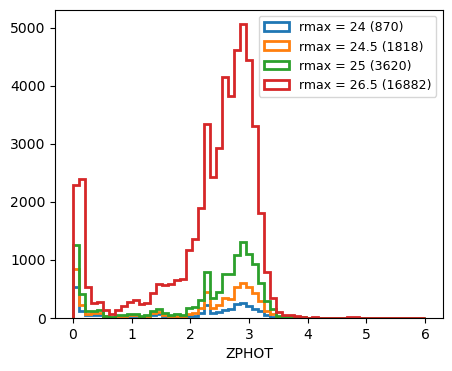

In [6]:
plt.figure(figsize=(5,4))
mask_udrop = lbg.LBG_SELECTION(catalog, conv, name='COSMOS_BXU_U_normagcut') * refined_selection_u(catalog, conv)
z_edges = np.linspace(0, 6, 60)
z_mid = np.array([(z_edges[i] + z_edges[i+1])/2 for i in range(len(z_edges)-1)])
rmax_list = [24, 24.5, 25, 26.5]
rmax_name = ['24', '24_5', '25', '26_5']
rmin = 22.5
for i, rmax in enumerate(rmax_list):
    mask_r = (catalog['r'] < rmax)*(catalog['r'] > rmin)
    density_udropout_ = np.sum(mask_udrop * mask_r)/11.26
    n_udrop_, b, _ = plt.hist(catalog['ZPHOT'][mask_udrop * mask_r], 
                             bins=z_edges, histtype='step', linewidth=2, label = f'rmax = {rmax_list[i]} ({density_udropout_:.0f})')
    np.savez(f'../target_selection/photom_redshift_distribution/nz_photom_lbg_udropout_rmin22_5_rmax{rmax_name[i]}.npz',
         z=z_mid, 
         nz=n_udrop_/np.trapz(n_udrop_, z_mid), 
         bz=3.3*np.ones(len(z_mid)), 
         object_density_deg2=density_udropout_)
plt.legend(fontsize=9)
plt.xlabel('ZPHOT')

Text(0.5, 0, 'ZPHOT')

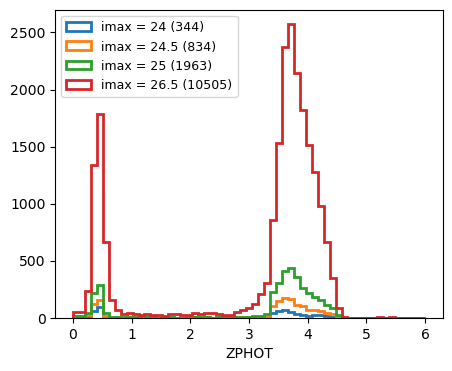

In [7]:
plt.figure(figsize=(5,4))
mask_gdrop = lbg.LBG_SELECTION(catalog, conv, name='COSMOS_G_noimagcut') * refined_selection_g(catalog, conv)
imax_list = [24, 24.5, 25, 26.5]
imax_name = ['24', '24_5', '25', '26_5']
imin = 22.5
for i, imax in enumerate(imax_list):
    mask_i = (catalog['i'] < imax)*(catalog['i'] > imin)
    density_gdropout_ = np.sum(mask_gdrop * mask_i)/11.26
    n_gdrop_, b, _ = plt.hist(catalog['ZPHOT'][mask_gdrop * mask_i], 
                             bins=z_edges, histtype='step', linewidth=2, label = f'imax = {imax_list[i]} ({density_gdropout_:.0f})')
    np.savez(f'../target_selection/photom_redshift_distribution/nz_photom_lbg_gdropout_imin22_5_imax{imax_name[i]}.npz',
         z=z_mid, 
         nz=n_gdrop_/np.trapz(n_gdrop_, z_mid), 
         bz=4*np.ones(len(z_mid)), 
         object_density_deg2=density_gdropout_)
plt.legend(fontsize=9)
plt.xlabel('ZPHOT')

Text(0.5, 0, 'ZPHOT')

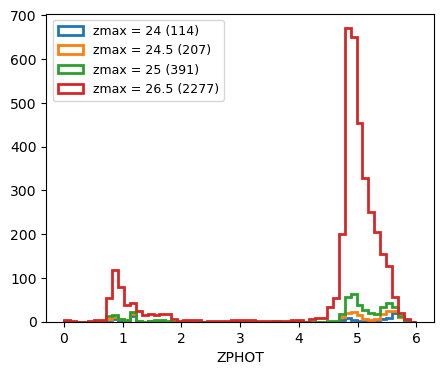

In [9]:
plt.figure(figsize=(5,4))
mask_rdrop = lbg.LBG_SELECTION(catalog, conv, name='COSMOS_R_nozmagcut') * refined_selection_r(catalog, conv)
zmax_list = [24, 24.5, 25, 26.5]
zmax_name = ['24', '24_5', '25', '26_5']
zmin = 22.5
for i, zmax in enumerate(zmax_list):
    mask_z = (catalog['z'] < zmax)*(catalog['z'] > zmin)
    density_rdropout_ = np.sum(mask_rdrop * mask_z)/11.26
    n_rdrop_, b, _ = plt.hist(catalog['ZPHOT'][mask_rdrop * mask_z], 
                             bins=z_edges, histtype='step', linewidth=2, label = f'zmax = {zmax_list[i]} ({density_rdropout_:.0f})')
    np.savez(f'../target_selection/photom_redshift_distribution/nz_photom_lbg_rdropout_zmin22_5_zmax{imax_name[i]}.npz',
         z=z_mid, 
         nz=n_rdrop_/np.trapz(n_rdrop_, z_mid), 
         bz=4.5*np.ones(len(z_mid)), 
         object_density_deg2=density_rdropout_)
plt.legend()
plt.xlabel('ZPHOT')
plt.legend(fontsize=9)
plt.xlabel('ZPHOT')